In [1]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import datetime
finviz_url="https://finviz.com/quote.ashx?t="

In [2]:
df = pd.read_csv('portfolio.csv')

In [3]:
tickers=list(df.loc[df.Exchange=='NASDAQ']['Ticker'])

In [4]:
news_tables={}
#parse quote
for ticker in tickers:
    print(ticker)
    try:
        url=finviz_url+ticker
        req= Request(url=url,headers={'user-agent':'my-app'})
        response=urlopen(req)
        html=BeautifulSoup(response,'html')
        news_table=html.find(id="news-table")
        news_tables[ticker]=news_table
    except:
        print(ticker+',error url')
    pass


parsed_data = []
for ticker, news_table in news_tables.items(): #extract key value pair
    try:
        for row in news_table.findAll('tr'): #HTML <tr> element defines a row of cells in a table
            title = row.a.text  #this is a tag, to find the a and give what is behind
            date_data = row.td.text.split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, date, time, title])
    except:
        print(ticker+',error news')
        pass
    

NOTV
TLC
ACLS
CNTY
FTNT
GBDC
GOOG
GOOGL
GPRE
INMD
KLIC
LSXMB
LSXMB,error url
BRY
FCFS
MYGN
NWS
OEG
SPNE


In [10]:
print(parsed_data)

[['NOTV', 'Apr-06-21', '08:33AM\xa0\xa0', 'Inotiv, Inc. Announces Partnership with PhoenixBio Co., Ltd. to Expand Discovery Pharmacology Offering'], ['TLC', 'Mar-02-21', '04:00AM\xa0\xa0', 'TLC to Present at Upcoming Virtual Investor Conferences'], ['TLC', 'Feb-05-21', '04:15AM\xa0\xa0', 'TLC Reports Fiscal Year End 2020 Financial Results\xa0and Provides Business Update'], ['TLC', 'Jan-04-21', '05:00AM\xa0\xa0', 'TLC Announces Completion of US$15 Million Financing for Subsidiary InspirMed Inc.'], ['TLC', 'Dec-28-20', '04:00AM\xa0\xa0', 'TLC Announces Full Patient Enrollment in EXCELLENCE Trial of TLC599 for Osteoarthritis Pain'], ['TLC', 'Dec-18-20', '04:00AM\xa0\xa0', 'TLC Provides Corporate Update at Investor Conference'], ['TLC', 'Nov-03-20', '07:38AM\xa0\xa0', 'TLC Announces Acceptance of Manuscript on Anti-COVID-19 Program by Clinical and Translational Science Journal'], ['TLC', 'Oct-28-20', '04:51AM\xa0\xa0', 'TLC Reports Third Quarter 2020 Financial Results and Provides Business

In [14]:
df=pd.DataFrame(parsed_data,columns=['ticker', 'date', 'time', 'title'])
vader=SentimentIntensityAnalyzer()
#print(vader.polarity_scores('see you!!!')) #how vader works
f=lambda title: vader.polarity_scores(title)['compound'] #returns only compund

df['compound']=df['title'].apply(f)
df['date']=pd.to_datetime(df.date).dt.date
df['date']=pd.to_datetime(df.date).dt.date
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()

finaldf=pd.DataFrame(columns=['ticker', 'sentiment'])

In [15]:
mean_df=mean_df.iloc[::-1]
number_of_days=31
tickerlist=[]
sentiment=[]
for i in range(len(mean_df.columns)):
    meandf=mean_df.iloc[:number_of_days,i].dropna()
    tickerlist.append(mean_df.columns[i])
    sentiment.append(meandf.mean())
    
finaldf['ticker']=tickerlist
finaldf['sentiment']=sentiment
finaldf.sort_values(by=['sentiment'],ascending=False)
finaldf
    

,ticker,sentiment
0,ACLS,0.429600
1,BRY,0.075433
2,CNTY,0.056838
3,FCFS,NaN
4,FTNT,0.266586
5,GBDC,0.000000
6,GOOG,0.096067
7,GOOGL,0.097743
8,GPRE,0.237214
9,INMD,0.048383


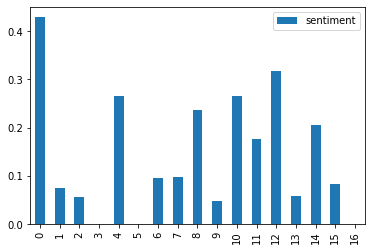

In [16]:

finaldf.plot(kind='bar')
plt.show()